## LENDING CLUB PROJECT

Keras Project for the "Python for Data Science and Machine Learning Bootcamp" course on Udemy:https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/

Data used for the project is a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

However, the file provided for the course has modifications so it has extra feature engineering to be done

### GOAL
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan?

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import data description
data_info = pd.read_csv('data/lending_club_info.csv',index_col='LoanStatNew')
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", 200)
data_info

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"


In [3]:
#Import data
loans = pd.read_csv('data/lending_club_loan_two.csv')
loans.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,Verified,Sep-2015,Fully Paid,debt_consolidation,Debt consolidation,16.31,Jan-2005,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,"1726 Cooper Passage Suite 129\nNorth Deniseberg, DE 30723"
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,Sep-2015,Fully Paid,home_improvement,Home improvement,1.36,Aug-2005,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX 22690"
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,Not Verified,Sep-2012,Fully Paid,credit_card,No More Credit Cards,26.87,Sep-1994,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,12.52,Jun-1994,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,Verified,Apr-2012,Fully Paid,debt_consolidation,Debt Consolidation,23.69,Dec-1997,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813"


In [4]:
loans.info() #Appears to have some missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
loans.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
loans.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

## PART 1: EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='loan_status', ylabel='count'>

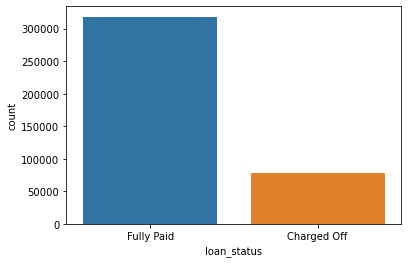

In [7]:
#Check for a balanced dataset
sns.countplot(x='loan_status',data=loans)

In [8]:
#Dataset biased towards fully paid loans

<AxesSubplot:>

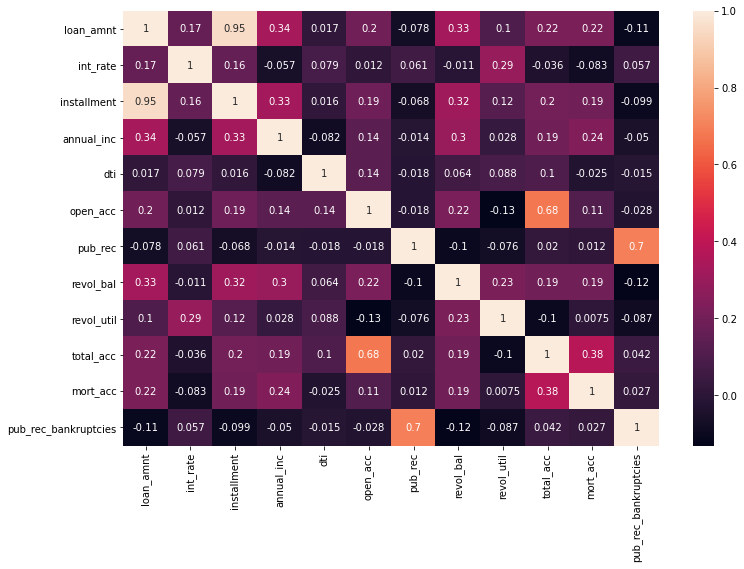

In [9]:
#View correlations between variables
plt.figure(figsize=(12,8))
sns.heatmap(loans.corr(),annot=True)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

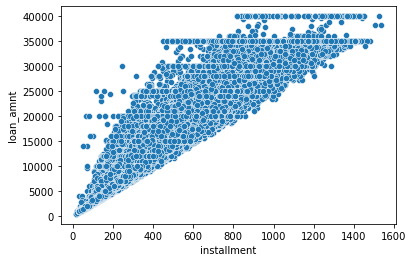

In [10]:
#Scatterplot of installment vs loan_amnt
sns.scatterplot(x='installment',y='loan_amnt',data=loans)

#As expected, higher loan_amnts lead to higher installments

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

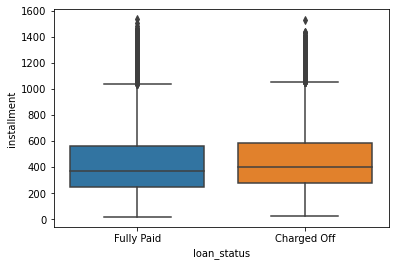

In [11]:
sns.boxplot(x='loan_status',y='installment',data=loans)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

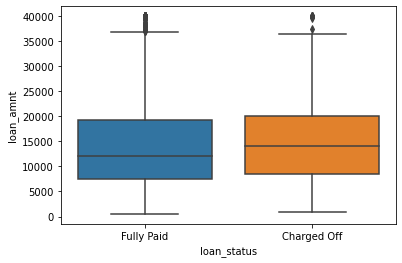

In [12]:
sns.boxplot(x='loan_status',y='loan_amnt',data=loans)

## PART 2: DATA PREPROCESSING

In [13]:
# Explore how many categories there are the categorical features: term, grade, sub_grade, emp_title, home_ownership, 
# verification_status, loan_status, purpose, title, initial_list_status, application_type

def how_many(df,name):
    print(f'{name}: {df[name].value_counts().shape[0]}\n')

how_many(loans,'term')
how_many(loans,'grade')
how_many(loans,'sub_grade')
how_many(loans,'emp_title')
how_many(loans,'home_ownership')
how_many(loans,'verification_status')
how_many(loans,'loan_status')
how_many(loans,'purpose')
how_many(loans,'title')
how_many(loans,'initial_list_status')
how_many(loans,'application_type')


term: 2

grade: 7

sub_grade: 35

emp_title: 173105

home_ownership: 6

verification_status: 3

loan_status: 2

purpose: 14

title: 48817

initial_list_status: 2

application_type: 3



In [14]:
#Too many categorical values for emp_title and title; these will be dropped
#Additionally, grade and subgrade are redundant with each other. Work with subgrade (includes gra)
loans.drop('grade emp_title title'.split(),axis=1,inplace=True)

In [15]:
#Check head again
loans.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [16]:
#Make a new column 'emp_length_years' with only the number of years for employment length (i.e, 1,2,...,10)
#1 year or less will be noted as 1 year; conversely, 10+ years will be noted as 10
#Missing data (ie NaN) will be treated as 0 years

def conv_years(year_string):
    if ((year_string != year_string) or (year_string[0] == '<')): #NaN or < 1 year
        return 0
    
    else:
        digits = year_string.split()[0]
        
        if (len(digits) == 1): #Only for 1,2,3,4,5,6,7,8
            return int(digits)
        
        else: #Only for 10+
            digits = digits.replace('+', '')
            return int(digits)

loans['emp_length_years']=loans['emp_length'].apply(conv_years)

#Now drop unformatted column
loans.drop('emp_length',axis=1,inplace=True)

In [17]:
loans.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_length_years
0,10000.0,36 months,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",10
1,8000.0,36 months,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",4
2,15600.0,36 months,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0
3,7200.0,36 months,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",6
4,24375.0,60 months,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",9


In [18]:
#Check for remaining missing values

loans.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
emp_length_years            0
dtype: int64

In [19]:
# Fill out or drop remaining nulls. These still show up in three fields: 
# revol_util - Revolving line utilization rate, or the amount of credit the borrower 
#              is using relative to all available revolving credit.
# mort_acc   - Number of mortgage accounts.
# pub_rec_bankruptcies - Number of public record bankruptcies

#Check percentage of the fiels that are null
loans.isnull().sum()/loans.value_counts().sum() * 100

loan_amnt                0.000000
term                     0.000000
int_rate                 0.000000
installment              0.000000
sub_grade                0.000000
home_ownership           0.000000
annual_inc               0.000000
verification_status      0.000000
issue_d                  0.000000
loan_status              0.000000
purpose                  0.000000
dti                      0.000000
earliest_cr_line         0.000000
open_acc                 0.000000
pub_rec                  0.000000
revol_bal                0.000000
revol_util               0.077092
total_acc                0.000000
initial_list_status      0.000000
application_type         0.000000
mort_acc                10.556850
pub_rec_bankruptcies     0.149435
address                  0.000000
emp_length_years         0.000000
dtype: float64

In [20]:
#Null values will be replaced by zeros. Hypothesis: these missing data indicate these attributes simply aren't there.
#ie for a missing mort_acc value, assume the person simply has no mortgage accounts.
loans.fillna(0,inplace=True)

In [21]:
loans.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_length_years
0,10000.0,36 months,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",10
1,8000.0,36 months,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",4
2,15600.0,36 months,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0
3,7200.0,36 months,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",6
4,24375.0,60 months,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",9


In [22]:
#Replace the ANY and NONE entries of home_ownership with "OTHER"
loans['home_ownership']=loans['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [23]:
#Obtain just the zip codes from the address column
loans['zip_code'] = loans['address'].apply(lambda address:address[-5:])

#Drop address
loans.drop('address',axis=1,inplace=True)

<AxesSubplot:xlabel='zip_code', ylabel='count'>

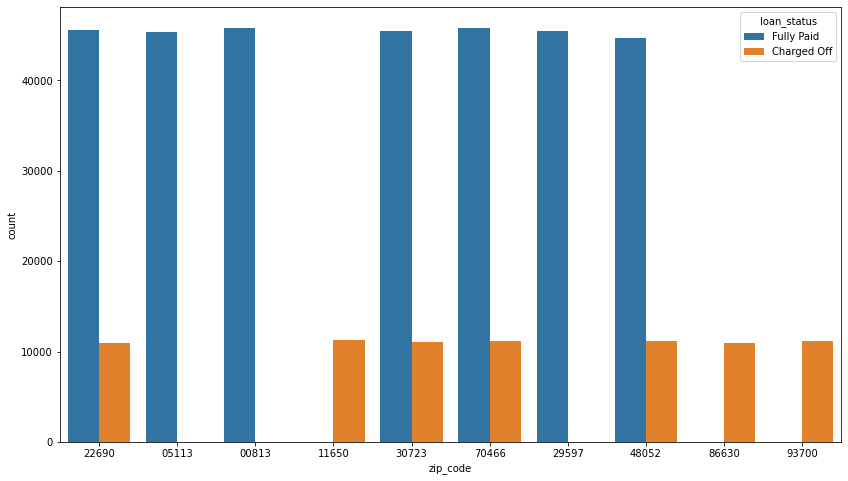

In [24]:
#Check relationship between zip_code and loan_status
plt.figure(figsize=(14,8))
sns.countplot(x='zip_code',data=loans,hue='loan_status')

In [25]:
#We can see a very strong relationship! Three zip codes have no loans charged off, while three different zip codes
#have no loans fully paid!

In [26]:
#Now replace categorical columns will dummy variable columns

#Columns to be replaced by dummy columns:
replace_columns='term sub_grade home_ownership verification_status loan_status purpose initial_list_status application_type zip_code'.split()

#Prefixes for dummy columns:
dummy_prefixes='term SG HO VS LS pur ILS AT zip'.split()

#Replace
for colname,prefix in zip(replace_columns,dummy_prefixes):
        temp = pd.get_dummies(loans[colname],prefix=prefix,drop_first=True)
        loans = pd.concat([loans,temp],axis=1)
        loans.drop(colname,axis=1,inplace=True)

#Check new head
loans.head()

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,emp_length_years,term_ 60 months,SG_A2,SG_A3,SG_A4,SG_A5,SG_B1,SG_B2,SG_B3,SG_B4,SG_B5,SG_C1,SG_C2,SG_C3,SG_C4,SG_C5,SG_D1,SG_D2,SG_D3,SG_D4,SG_D5,SG_E1,SG_E2,SG_E3,SG_E4,SG_E5,SG_F1,SG_F2,SG_F3,SG_F4,SG_F5,SG_G1,SG_G2,SG_G3,SG_G4,SG_G5,HO_OTHER,HO_OWN,HO_RENT,VS_Source Verified,VS_Verified,LS_Fully Paid,pur_credit_card,pur_debt_consolidation,pur_educational,pur_home_improvement,pur_house,pur_major_purchase,pur_medical,pur_moving,pur_other,pur_renewable_energy,pur_small_business,pur_vacation,pur_wedding,ILS_w,AT_INDIVIDUAL,AT_JOINT,zip_05113,zip_11650,zip_22690,zip_29597,zip_30723,zip_48052,zip_70466,zip_86630,zip_93700
0,10000.0,11.44,329.48,117000.0,Jan-2015,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0
1,8000.0,11.99,265.68,65000.0,Jan-2015,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,43057.0,Jan-2015,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,54000.0,Nov-2014,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,609.33,55000.0,Apr-2013,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [27]:
#Drop 'issue_d' as, on a real test case, we wouldn't know at first if the loan was issued or not!
loans.drop('issue_d',axis=1,inplace=True)

In [28]:
#Convert earliest_cr_line to a new column 'earliest_cr_year' featuring only the year as an integer
loans['earliest_cr_year'] = loans['earliest_cr_line'].apply(lambda date:int(date[-4:]))
loans.drop('earliest_cr_line',axis=1,inplace=True)

## PART 3: SEPARATING DATA

In [29]:
from sklearn.model_selection import train_test_split

#Trying to predict 'LS_Fully Paid'. Set y to 'LS_Fully Paid', x has the other features. Take values for compatibility with Tensorflow.
#Also drop 'issue_d' and 'earliest_cr_line' columns as they are datetimes, not floats
x = loans.drop(['LS_Fully Paid'],axis=1).values
y = loans['LS_Fully Paid'].values

In [30]:
#Train/test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train.shape #79 features

(316824, 79)

In [31]:
#Scale data, as values in x have different scales
from sklearn.preprocessing import MinMaxScaler

#Instanciate scaler
scaler = MinMaxScaler()

In [32]:
#Use only training data to fit scaler and scale said training data
x_train = scaler.fit_transform(x_train)

#Then scale test data (not used to fit!)
x_test = scaler.transform(x_test)

## PART 4: SETTING UP A TENSOR FLOW NEURAL NETWORK

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [34]:
#Setup early stop
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [35]:
#Setting up the model
model = Sequential()

#Use as many nodes as there are features in the first layer; then use half in subsequent layers
#Drop 'drop_perc' of notes

feat = x_train.shape[1]
drop_perc = 0.2

while (feat > 10):
    model.add(Dense(feat,activation='relu'))
    model.add(Dropout(drop_perc))
    feat=int(feat/2)

#Final layer with just one node (Binary Classification)
model.add(Dense(1,activation='sigmoid'))

#Compile
model.compile(loss='binary_crossentropy',optimizer='adam')

In [36]:
#Fit model
model.fit(x=x_train,
          y=y_train,
          epochs=1200,
          batch_size=256,
          validation_data=(x_test,y_test),
          callbacks=[early_stop])

Epoch 1/1200
1238/1238 [==============================] - 5s 4ms/step - loss: 0.2970 - val_loss: 0.2659
Epoch 2/1200
1238/1238 [==============================] - 4s 4ms/step - loss: 0.2648 - val_loss: 0.2630
Epoch 3/1200
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2622 - val_loss: 0.2628
Epoch 4/1200
1238/1238 [==============================] - 4s 4ms/step - loss: 0.2613 - val_loss: 0.2624
Epoch 5/1200
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2601 - val_loss: 0.2623
Epoch 6/1200
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2599 - val_loss: 0.2620
Epoch 7/1200
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2594 - val_loss: 0.2616
Epoch 8/1200
1238/1238 [==============================] - 4s 4ms/step - loss: 0.2590 - val_loss: 0.2619
Epoch 9/1200
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2590 - val_loss: 0.2618
Epoch 10/1200
1238/1238 [==============================] - 4s 3m

<AxesSubplot:>

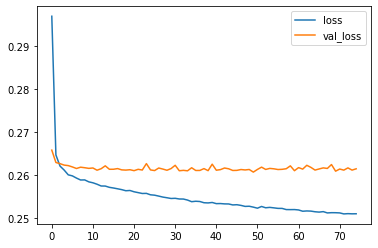

In [37]:
#Check error for overfitting or underfitting
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## PART 5: MODEL PREDICTIONS

In [38]:
nn_pred = (model.predict(x_test) > 0.5).astype('int32') #Sintax for predicting classes

#Deprecated syntax
#nn_pred = model.predict_classes(x_test) #Sintax for predicting classes

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
#Get classification report
print(classification_report(y_test,nn_pred))

              precision    recall  f1-score   support

           0       0.94      0.45      0.61     15574
           1       0.88      0.99      0.93     63632

    accuracy                           0.89     79206
   macro avg       0.91      0.72      0.77     79206
weighted avg       0.89      0.89      0.87     79206



In [41]:
#Get confusion matrix
print(confusion_matrix(y_test,nn_pred))

[[ 7000  8574]
 [  426 63206]]


In [42]:
#Very promising model!
#f-1 score for 0 (not fully paid) is lower, but this can be attributed to the biased dataset: very few people in the dataset
#did not pay the loan in full, compared to the people who paid in full.

## PART 6: COMPARING TO RANDOM FOREST CLASSIFIER

In [43]:
from sklearn.ensemble import RandomForestClassifier

#Instanciate RFC and fit
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

#Predictions
rfc_pred = rfc.predict(x_test)

#Evaluate
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.45      0.61     15574
           1       0.88      0.99      0.93     63632

    accuracy                           0.89     79206
   macro avg       0.92      0.72      0.77     79206
weighted avg       0.89      0.89      0.87     79206



[[ 6932  8642]
 [  337 63295]]


In [44]:
#Similar performance! However, the neural network is faster to train